In [243]:
import pandas as pd 
from pathlib import Path
import sys


# Import scientific librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from prophet import Prophet

# Add project directory to kernel paths
sys.path.append('../../')


print("We're running localy")

We're running localy


In [244]:
from src.data.file_manager import FileManager
weatherManager = FileManager()
color_pal = sns.color_palette()

*Format data for prophet model using ds and y*

In [245]:
raw_dir_path = weatherManager.data_dir / 'raw'

raw_path = str(raw_dir_path / 'full_data.csv')
df_final = pd.read_csv(raw_path)
# df_final.set_index("Years" , inplace=True)

#on rename index par Year
df_final = df_final.rename(columns={'Years': 'ds'})
df_final = df_final.rename(columns={'AverageTemperature': 'y'})
df_final


,ds,y
0,2000-01-01,11.738083
1,2001-01-01,11.361583
2,2002-01-01,11.767500
3,2003-01-01,12.076917
4,2004-01-01,11.266333
5,2005-01-01,11.229083
6,2006-01-01,11.871250
7,2007-01-01,11.571833
8,2008-01-01,11.200750
9,2009-01-01,11.607500


In [246]:
# Python
m = Prophet()
m.fit(df_final)

12:11:10 - cmdstanpy - INFO - Chain [1] start processing
12:11:10 - cmdstanpy - INFO - Chain [1] done processing


In [247]:
future = m.make_future_dataframe(periods=2)
future

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01
5,2005-01-01
6,2006-01-01
7,2007-01-01
8,2008-01-01
9,2009-01-01


In [248]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,11.149060,10.457842,11.910126
1,2001-01-01,11.116861,10.425995,11.870463
2,2002-01-01,11.484957,10.736891,12.225183
3,2003-01-01,11.593592,10.880770,12.332979
4,2004-01-01,11.442717,10.729543,12.131658
5,2005-01-01,11.410518,10.655561,12.073469
6,2006-01-01,11.778620,11.073758,12.499936
7,2007-01-01,11.887286,11.192065,12.646153
8,2008-01-01,11.736518,11.014780,12.471922
9,2009-01-01,11.704972,10.953692,12.435298


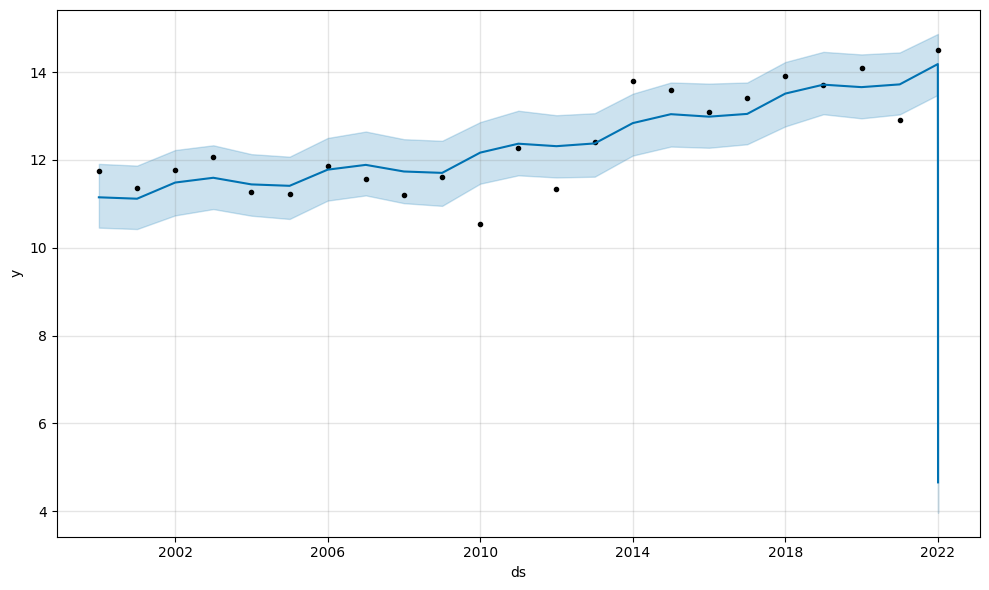

In [249]:
# Python
fig1 = m.plot(forecast)

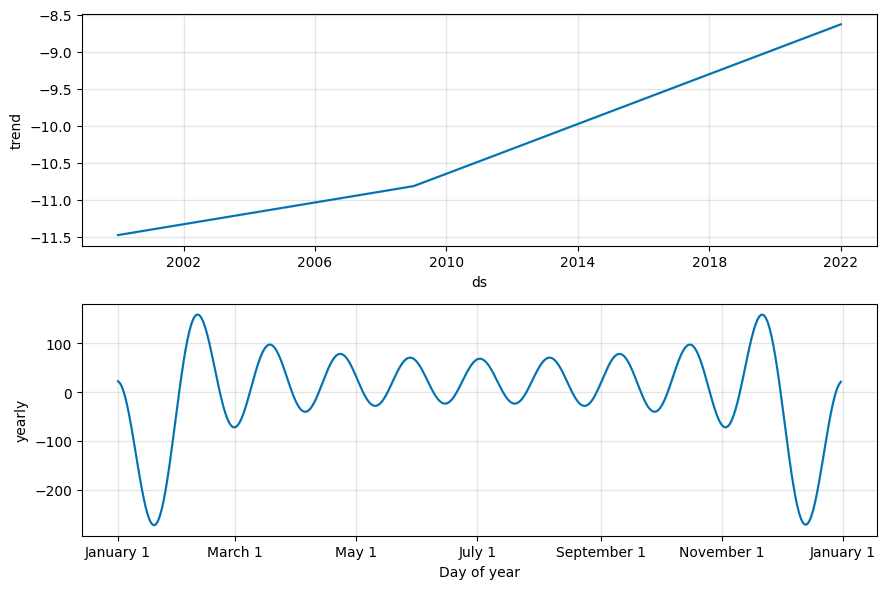

In [250]:
# Python
fig2 = m.plot_components(forecast)

In [251]:
# Python
from prophet.plot import plot_plotly

plot_plotly(m, forecast)

In [252]:
forecast = m.predict(df_final)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2000-01-01,11.149060,10.473744,11.887638
1,2001-01-01,11.116861,10.418805,11.846472
2,2002-01-01,11.484957,10.749464,12.158875
3,2003-01-01,11.593592,10.839486,12.301189
4,2004-01-01,11.442717,10.721251,12.105585
5,2005-01-01,11.410518,10.667695,12.155538
6,2006-01-01,11.778620,11.068490,12.533178
7,2007-01-01,11.887286,11.149365,12.571618
8,2008-01-01,11.736518,10.934151,12.413289
9,2009-01-01,11.704972,11.004530,12.431311


Plot train and test so you can see where we have the split

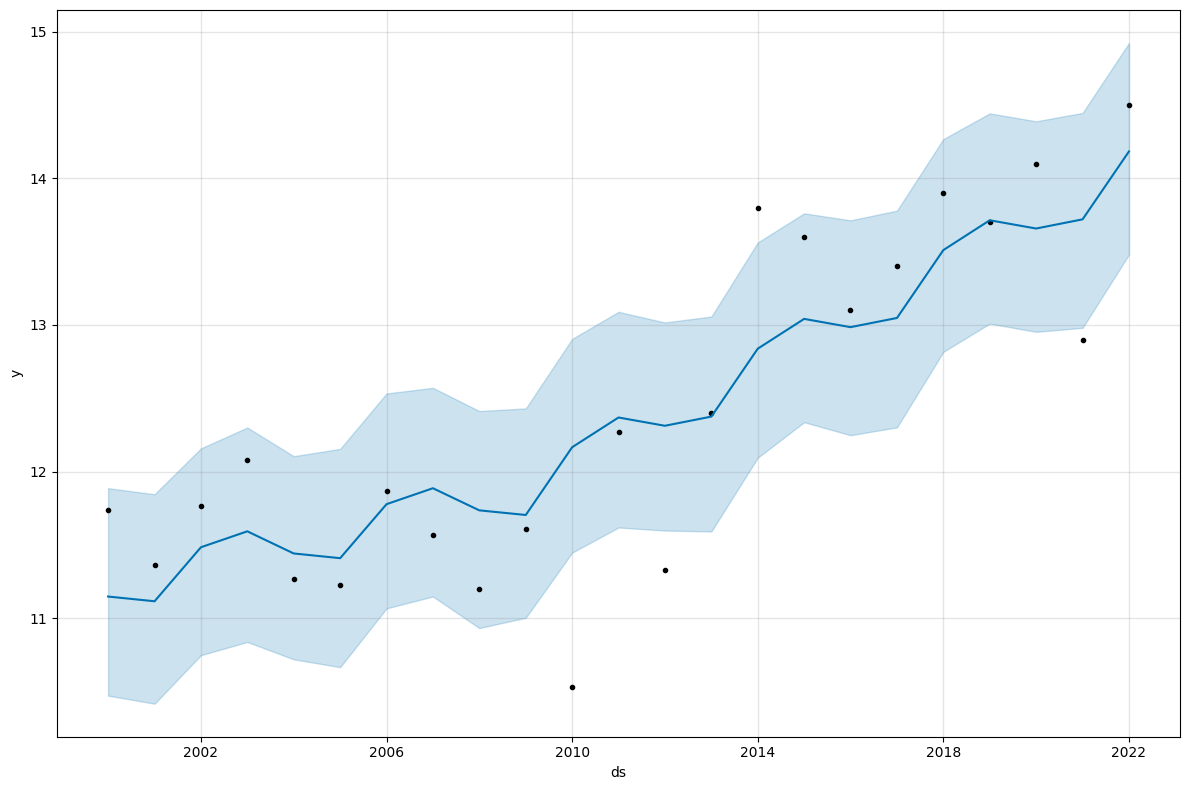

In [253]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = m.plot(forecast, ax=ax)
plt.show()

In [254]:
df_final.reset_index()
df_final

,ds,y
0,2000-01-01,11.738083
1,2001-01-01,11.361583
2,2002-01-01,11.767500
3,2003-01-01,12.076917
4,2004-01-01,11.266333
5,2005-01-01,11.229083
6,2006-01-01,11.871250
7,2007-01-01,11.571833
8,2008-01-01,11.200750
9,2009-01-01,11.607500
